In [1]:
import numpy as np
from matplotlib import pyplot as plt

## OT 1D

In [2]:
n = int(120)
m = int(110)

In [3]:
Gaussian = lambda t0,sigma,N: np.exp(-(np.arange(0,N)/N-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)
sigma = .06;
a = Gaussian(.25,sigma,n)
b = Gaussian(.8,sigma,m)

In [40]:
vmin = .01;
mass_a = 0.85
mass_b = 1.15

a = mass_a*normalize( a+np.max(a)*vmin)
b = mass_b*normalize( b+np.max(b)*vmin)
x = np.arange(0,n)/n
y = np.arange(0,m)/m

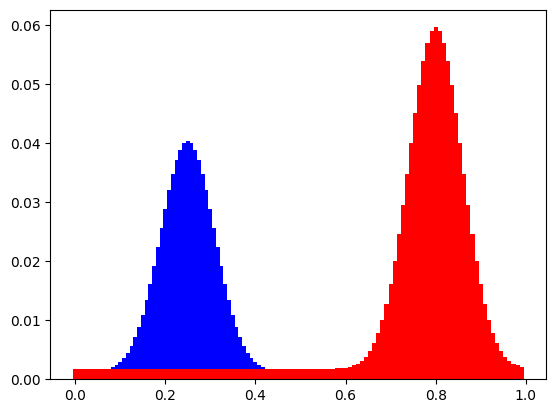

In [41]:
plt.bar(x, a, width = 1/n, color = "b")
plt.bar(y, b, width = 1/m, color = "r");

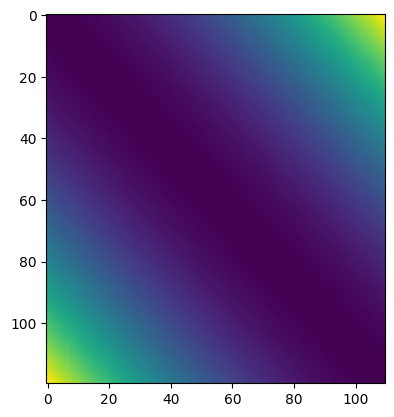

In [42]:
C = np.abs(x[:,None]-y[None,:])**2
plt.imshow(C);

In [43]:
def mina_u(H,epsilon): return -epsilon*np.log( np.sum(a[:,None] * np.exp(-H/epsilon),0) )
def minb_u(H,epsilon): return -epsilon*np.log( np.sum(b[None,:] * np.exp(-H/epsilon),1) )
def mina(H,epsilon): return mina_u(H-np.min(H,0),epsilon) + np.min(H,0);
def minb(H,epsilon): return minb_u(H-np.min(H,1)[:,None],epsilon) + np.min(H,1);

In [124]:
epsilon = 0.0001
rho = 0.1
kappa = rho/(rho+epsilon)

In [125]:
f = np.zeros(n)
niter = 1000
for it in range(niter):
    g = kappa*mina(C-f[:,None],epsilon)
    f = kappa*minb(C-g[None,:],epsilon)
# generate the coupling
P = a[:,None] * np.exp((f[:,None]+g[None,:]-C)/epsilon) * b[None,:]

In [126]:
def remap_plan(P): # boost contrast
    return np.log(.001+P)

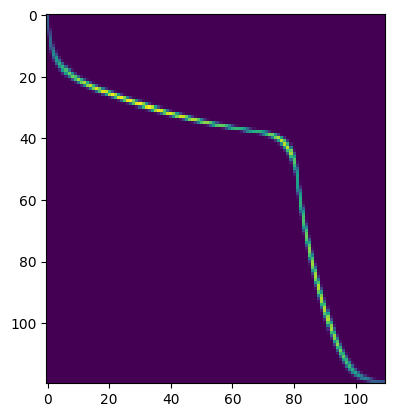

In [127]:
plt.imshow(remap_plan(P))

- The **row sum** $a_1 = P \mathbf{1}_m$ approximates the transported source marginal,
- The **column sum** $b_1 = P^\top \mathbf{1}_n$ approximates the transported target marginal.

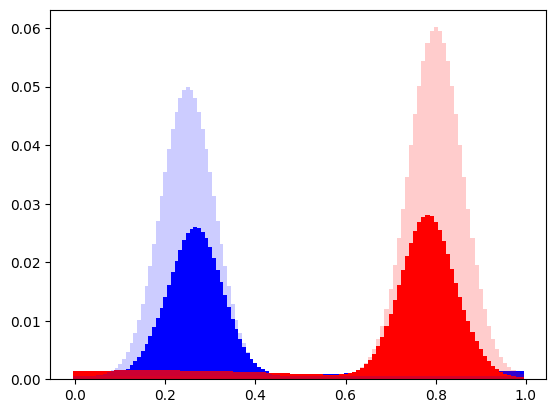

In [12]:
a1 = np.sum(P, axis=1)
b1 = np.sum(P.T, axis=1)
plt.bar(x, a1, width = 1/n, color = "b")
plt.bar(y, b1, width = 1/m, color = "r")
plt.bar(x, a, width = 1/n, color = "b", alpha=.2)
plt.bar(y, b, width = 1/m, color = "r", alpha=.2);

## OT 2D

In [13]:
n = 100
m = 200
a = np.ones((n,1))/n
b = np.ones((1,m))/m

x = np.random.rand(2,n)-.5
theta = 2*np.pi*np.random.rand(1,m)
r = .8 + .2*np.random.rand(1,m)
y = np.vstack((np.cos(theta)*r,np.sin(theta)*r))


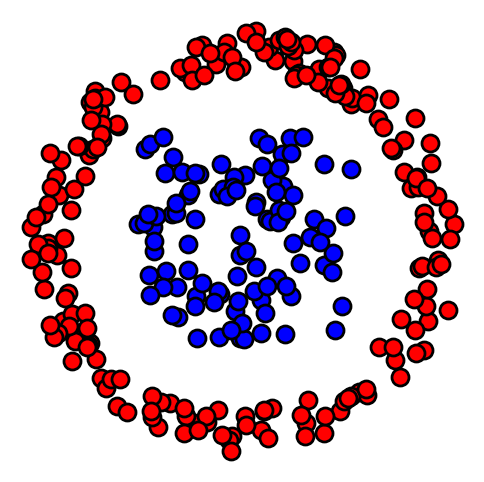

In [14]:
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=150, edgecolors="k", c=col, linewidths=2)
plt.figure(figsize=(6,6))
plotp(x, 'b')
plotp(y, 'r')
plt.axis("off");

In [15]:
def distmat(x,y):
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)
C = distmat(x,y)

In [16]:
def mina_u(H,epsilon): return -epsilon*np.log( np.sum(a * np.exp(-H/epsilon),0) )
def minb_u(H,epsilon): return -epsilon*np.log( np.sum(b * np.exp(-H/epsilon),1) )
def mina(H,epsilon): return mina_u(H-np.min(H,0),epsilon) + np.min(H,0);
def minb(H,epsilon): return minb_u(H-np.min(H,1)[:,None],epsilon) + np.min(H,1);

In [17]:
epsilon = .01
rho = 1000.2
kappa = rho/(rho+epsilon)

def Sinkhorn(C,epsilon,kappa,f,niter = 500):    
    Err = np.zeros(niter)
    for it in range(niter):
        g = kappa*mina(C-f[:,None],epsilon)
        f = kappa*minb(C-g[None,:],epsilon)
        # generate the coupling
        P = a * np.exp((f[:,None]+g[None,:]-C)/epsilon) * b
        # check conservation of mass
        Err[it] = np.linalg.norm(np.sum(P,0)-b,1)
    return (P,Err)

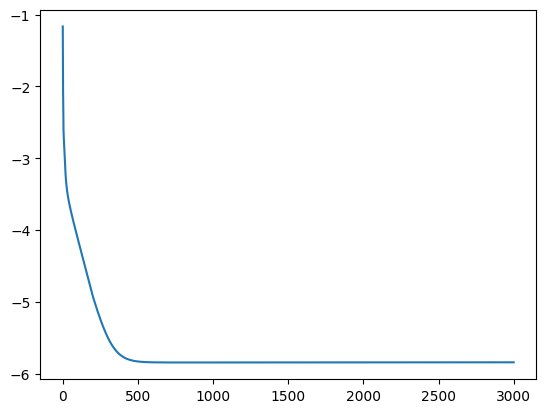

In [18]:
(P,Err) =  Sinkhorn(C,epsilon,kappa,np.zeros(n),3000)  
plt.plot(np.log10(Err));

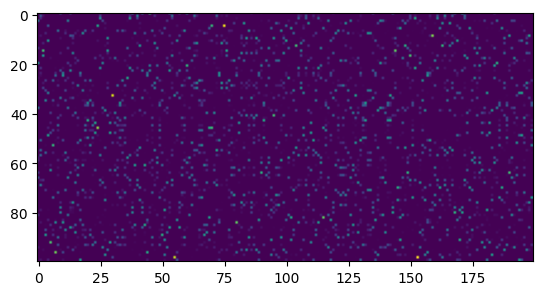

In [19]:
plt.imshow(remap_plan(P))